In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [33]:
dataset=pd.read_csv('CLV.csv')

In [34]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [35]:
dataset.shape

(303, 2)

In [36]:
dataset.info

<bound method DataFrame.info of      INCOME  SPEND
0       233    150
1       250    187
2       204    172
3       236    178
4       354    163
..      ...    ...
298     241    123
299     264    132
300     193    141
301     131    115
302     236    174

[303 rows x 2 columns]>

In [37]:
dataset.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


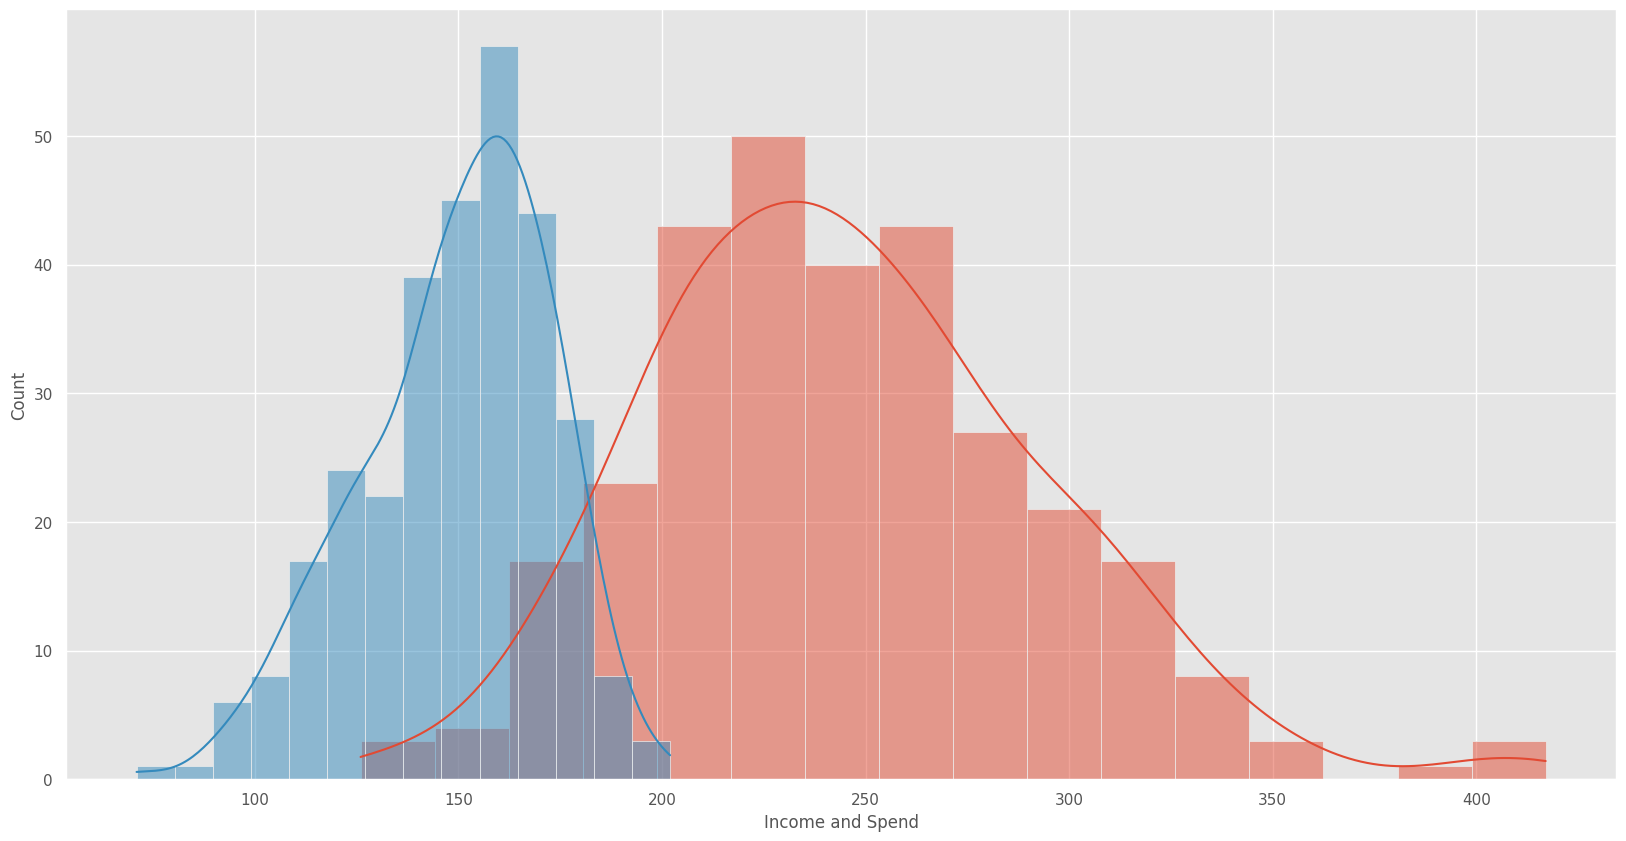

In [38]:
# Plotting distribution of income
income_distribution = sns.histplot(dataset["INCOME"], kde=True)
# Plotting distribution of spending
spend_distribution = sns.histplot(dataset["SPEND"], kde=True)

# Labeling the x-axis
plt.xlabel('Income and Spend')
plt.show()

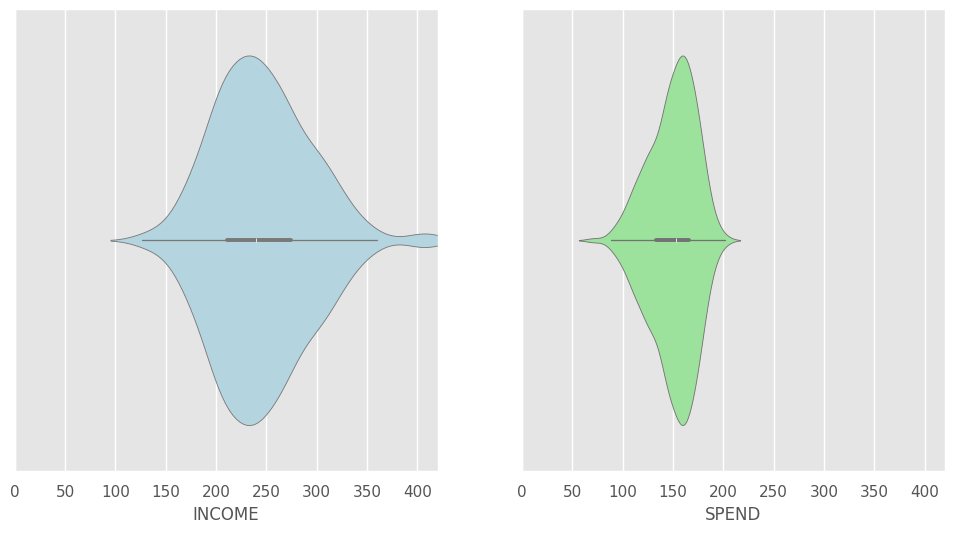

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Violin plot for 'INCOME'
income_violin = sns.violinplot(data=dataset, x='INCOME', color="lightblue", ax=ax[0])

# Violin plot for 'SPEND'
spend_violin = sns.violinplot(data=dataset, x='SPEND', color="lightgreen", ax=ax[1])

# Set x-axis limit for the first plot
income_violin.set_xlim(0, 420)

# Display the plots
plt.show()

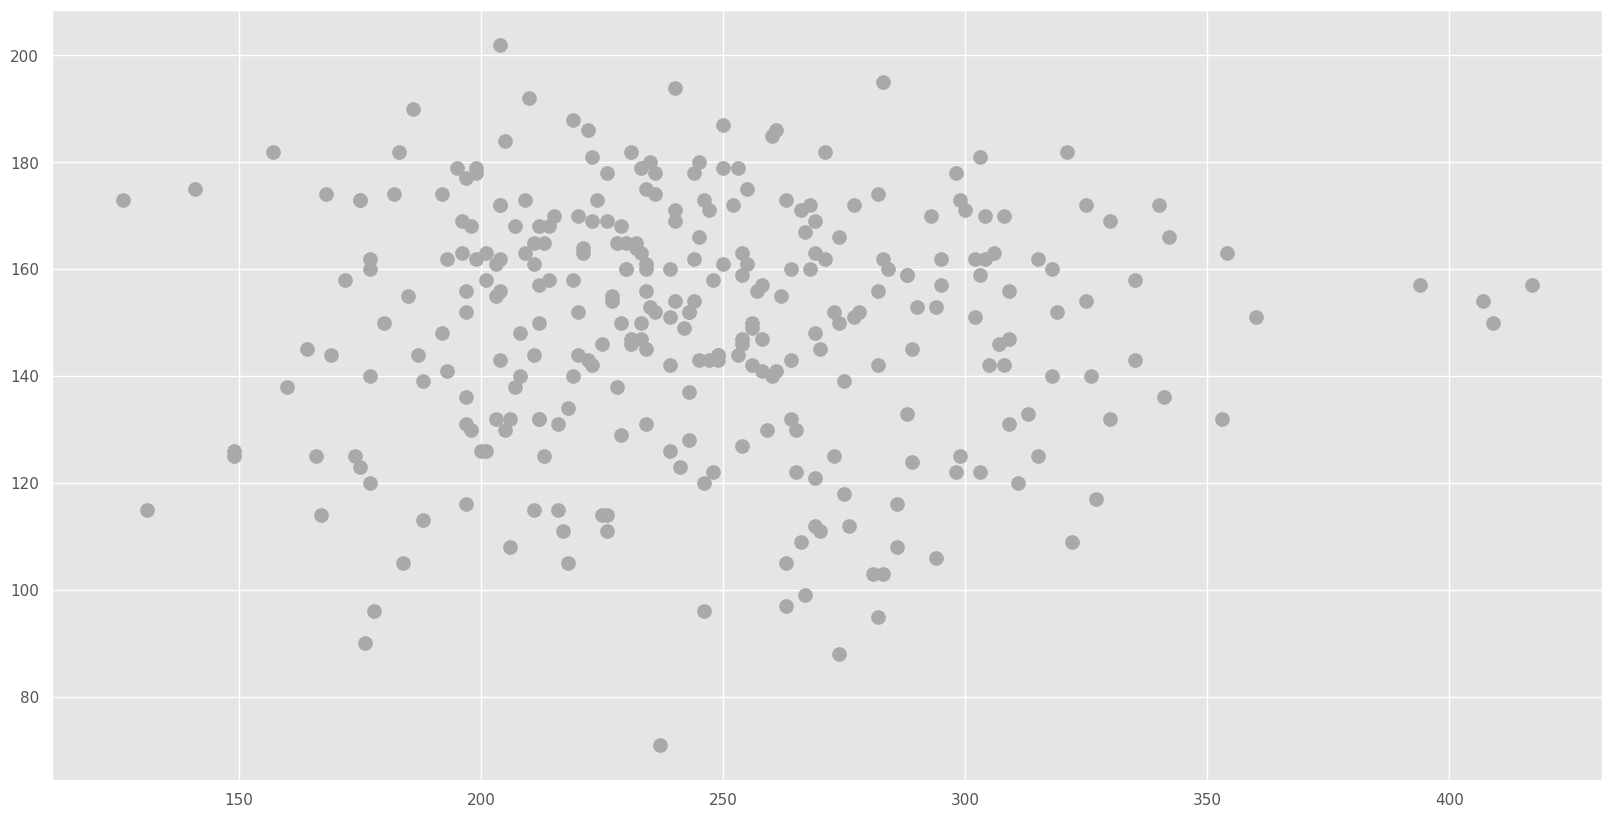

In [40]:
# Extract 'INCOME' and 'SPEND' as numpy arrays
income_values = dataset['INCOME'].to_numpy()
spend_values = dataset['SPEND'].to_numpy()

# Combine income and spend into a single array
data_points = np.column_stack((income_values, spend_values))

# Create a scatter plot
plt.scatter(income_values, spend_values, color='darkgray', marker='o', s=100)

# Display the plot
plt.show()

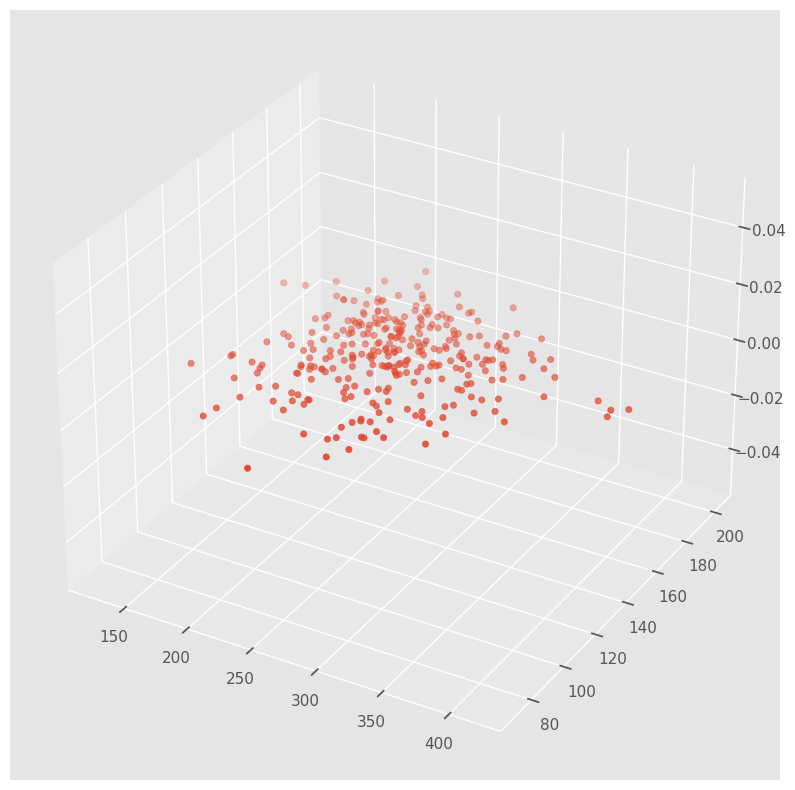

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a new figure for the 3D plot
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')

# Scatter plot in 3D using the first two columns of X
axis.scatter(X[:, 0], X[:, 1])

# Display the plot
plt.show()

In [42]:
X=dataset.iloc[:,[0,1]].values


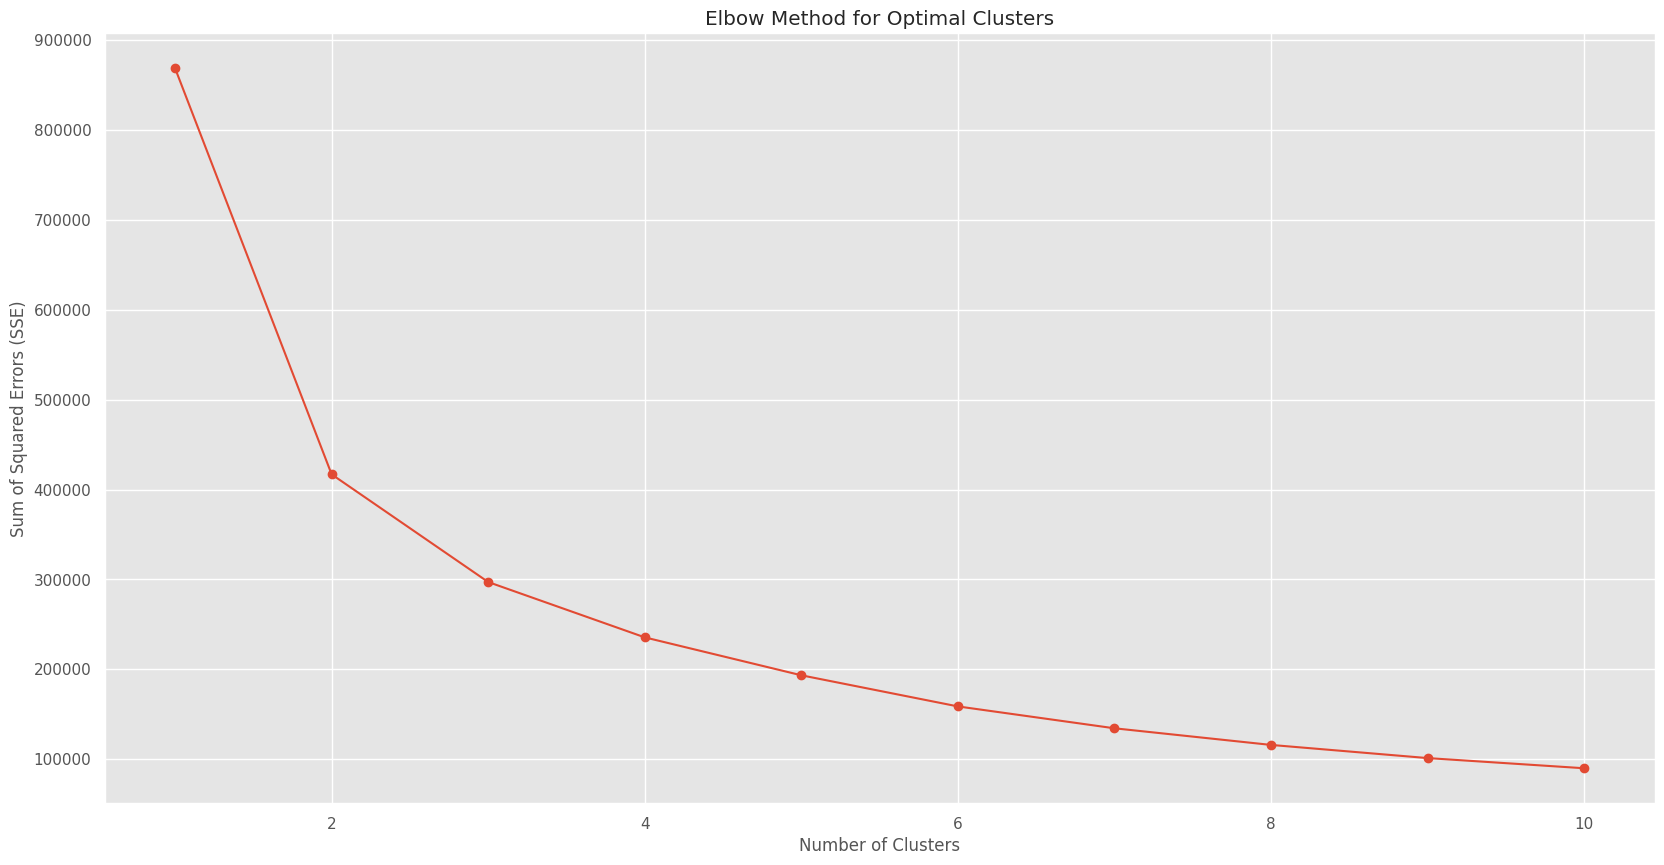

In [43]:
# List to store the within-cluster sum of squares (WCSS) for different cluster counts
sse = []
cluster_range = range(1, 11)

# Loop through different numbers of clusters to calculate WCSS
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the WCSS values to use the Elbow Method
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [44]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.3496519600970819
For n_clusters=5, The Silhouette Coefficient is 0.3509196339076459
For n_clusters=6, The Silhouette Coefficient is 0.3684661341601802
For n_clusters=7, The Silhouette Coefficient is 0.3597951742436717
For n_clusters=8, The Silhouette Coefficient is 0.3549809547498984
For n_clusters=9, The Silhouette Coefficient is 0.3517701842518287
For n_clusters=10, The Silhouette Coefficient is 0.3596121104498249


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

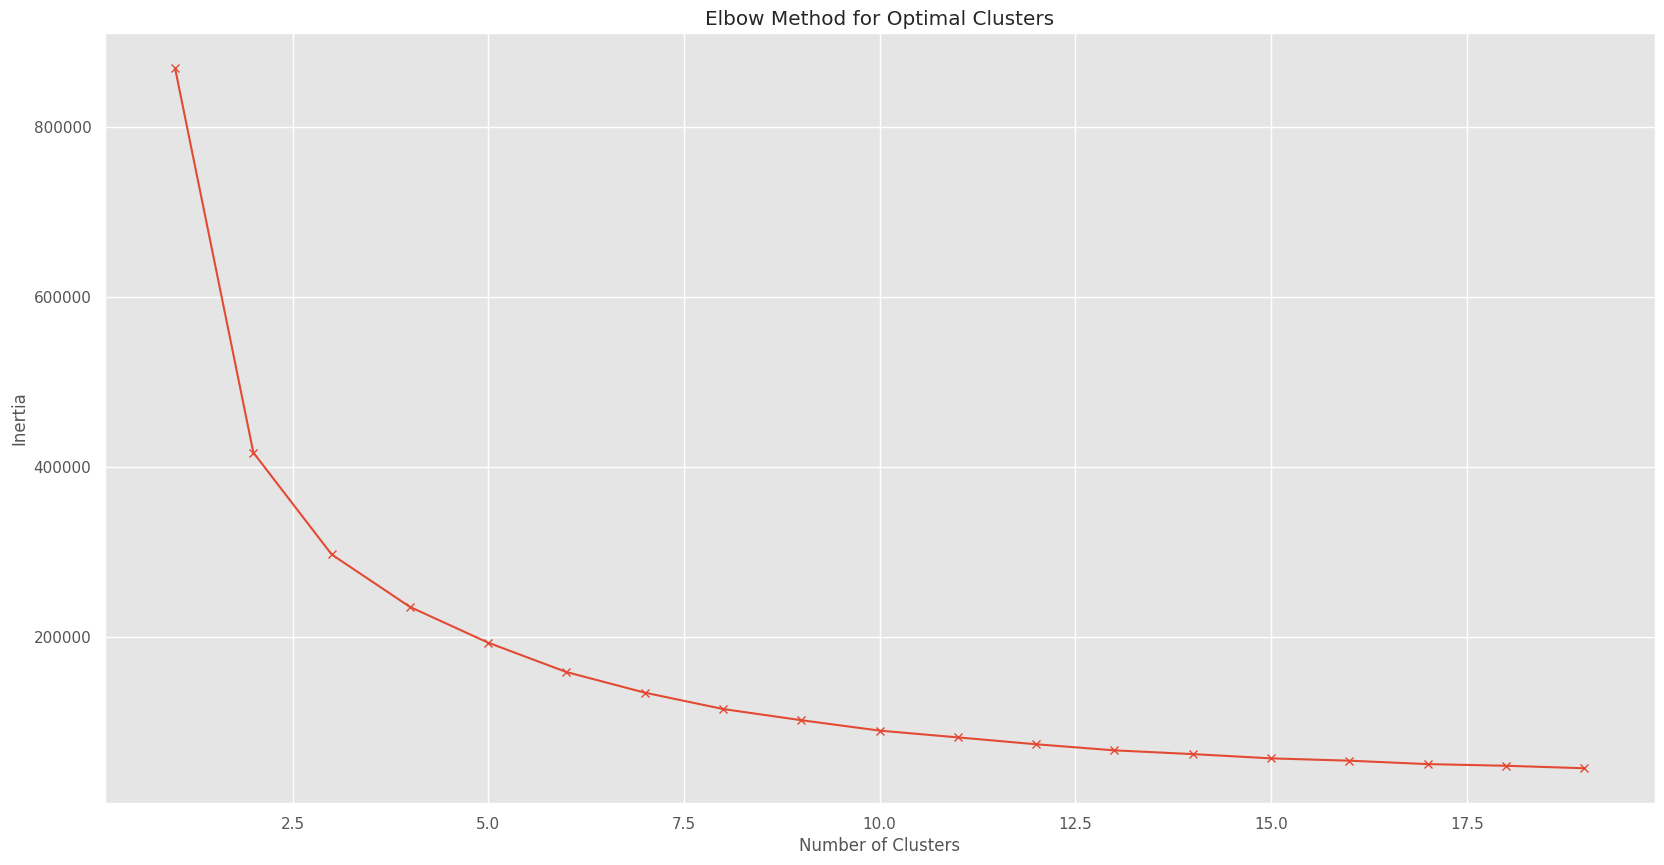

[868805.4785478542, 416914.6776446208, 297101.37642019405, 235435.61549707595, 193329.45777016308, 158805.9506591844, 134602.77102320464, 115350.47588514713, 102185.21056618833, 89942.27343090455, 81989.11182752144, 73890.71383964401, 66743.98682480081, 62342.26071179914, 57325.7526088978, 54596.94426618267, 50578.697152934285, 48626.31020231563, 45702.17064426956]


In [45]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Define the range for the number of clusters
num_clusters = range(1, 20)

# Create KMeans instances for each number of clusters
kmeans_models = [KMeans(n_clusters=n) for n in num_clusters]

# Calculate the score (inertia) for each KMeans model
scores = [model.fit(X).inertia_ for model in kmeans_models]

# Plotting the Elbow Curve
plt.plot(num_clusters, scores, marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

# Print the scores
print(scores)


In [46]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()


k: 1  cost: 868805.4785478542
k: 2  cost: 416914.6776446208
k: 3  cost: 297101.37642019405
k: 4  cost: 235435.61549707595
k: 5  cost: 194359.70619795992
k: 6  cost: 159041.43276615723
k: 7  cost: 134453.0262388516
k: 8  cost: 115885.74062480136
k: 9  cost: 101146.37439073995


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

k: 10  cost: 91233.46140996403



In [47]:
# Initialize KMeans with 4 clusters and fit to data
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Predict cluster labels for each data point
cluster_labels = kmeans_model.fit_predict(X)

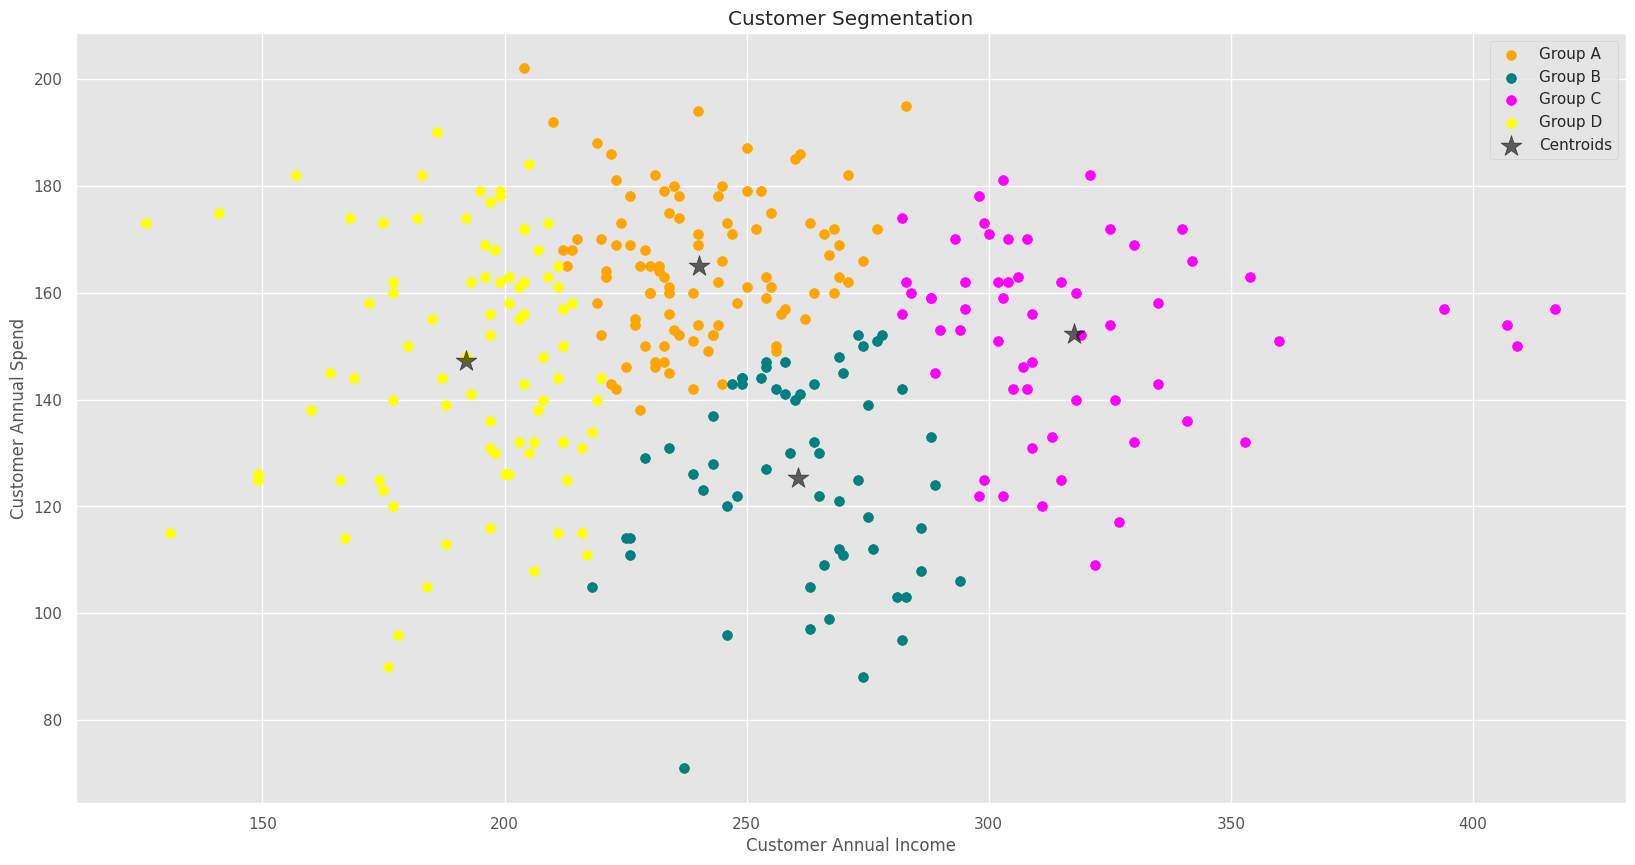

In [48]:
# Scatter plot for each cluster with different colors and markers
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s=50, c='orange', label='Group A')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s=50, c='teal', label='Group B')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s=50, c='magenta', label='Group C')
plt.scatter(X[cluster_labels == 3, 0], X[cluster_labels == 3, 1], s=50, c='yellow', label='Group D')

# Scatter plot for cluster centroids with different marker and color
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=250, marker='*', c='black', alpha=0.6, label='Centroids')

# Adding title and labels
plt.title('Customer Segmentation')
plt.xlabel('Customer Annual Income')
plt.ylabel('Customer Annual Spend')
plt.legend()
plt.grid(True)
plt.show()

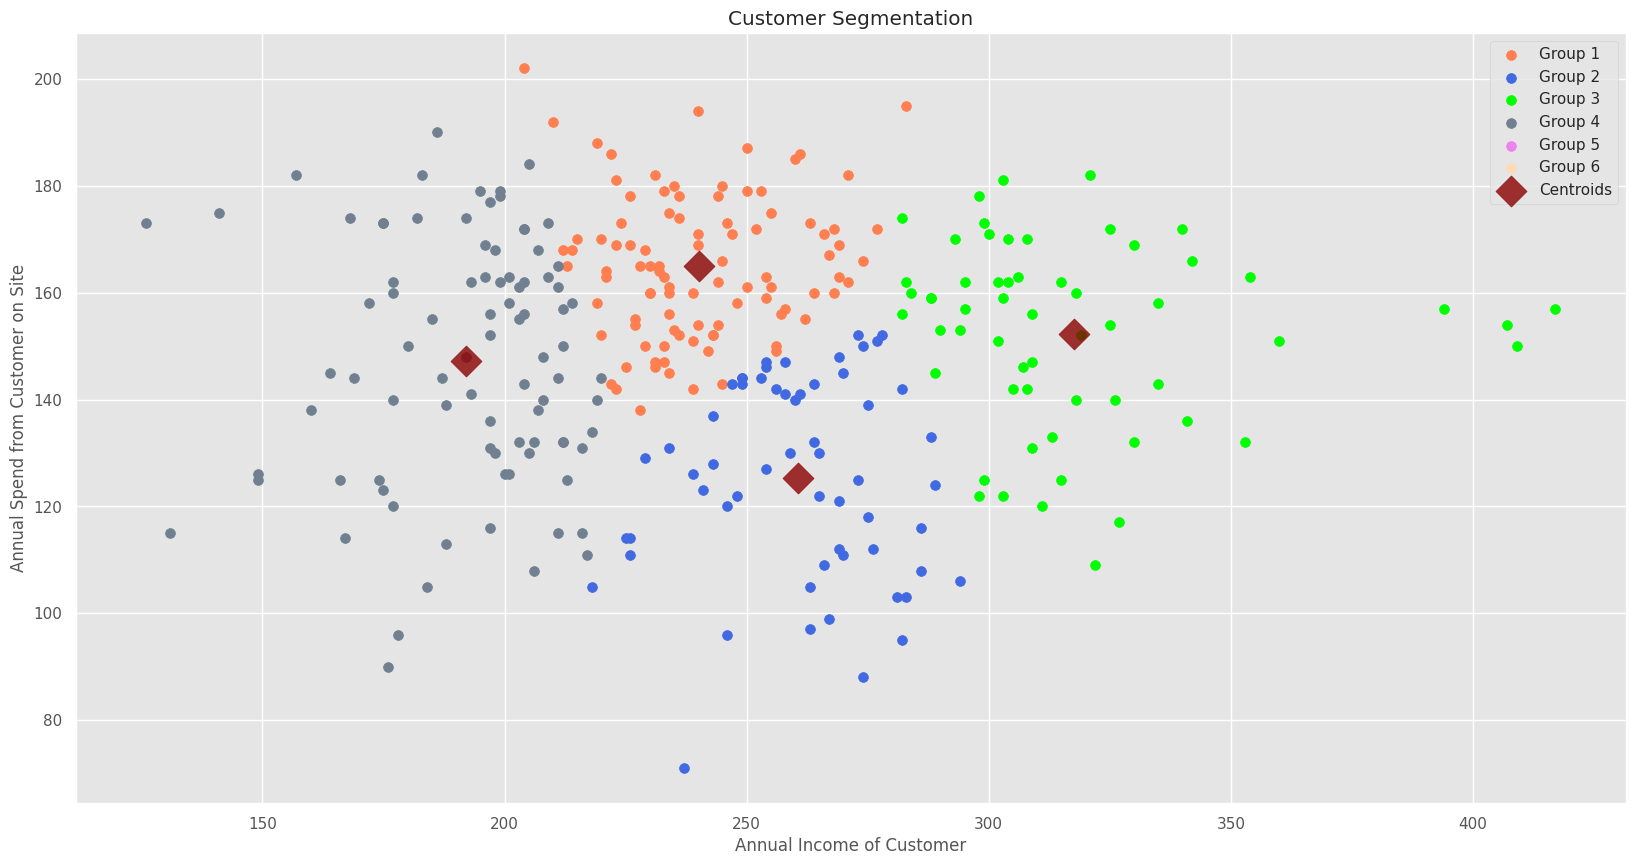

In [49]:


# Scatter plot for each cluster with new colors
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s=50, c='coral', label='Group 1')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s=50, c='royalblue', label='Group 2')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s=50, c='lime', label='Group 3')
plt.scatter(X[cluster_labels == 3, 0], X[cluster_labels == 3, 1], s=50, c='slategray', label='Group 4')
plt.scatter(X[cluster_labels == 4, 0], X[cluster_labels == 4, 1], s=50, c='violet', label='Group 5')
plt.scatter(X[cluster_labels == 5, 0], X[cluster_labels == 5, 1], s=50, c='peachpuff', label='Group 6')

# Scatter plot for cluster centroids with different marker and color
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=250, marker='D', c='darkred', alpha=0.8, label='Centroids')

# Adding title and labels
plt.title('Customer Segmentation')
plt.xlabel('Annual Income of Customer')
plt.ylabel('Annual Spend from Customer on Site')
plt.legend()
plt.grid(True)
plt.show()


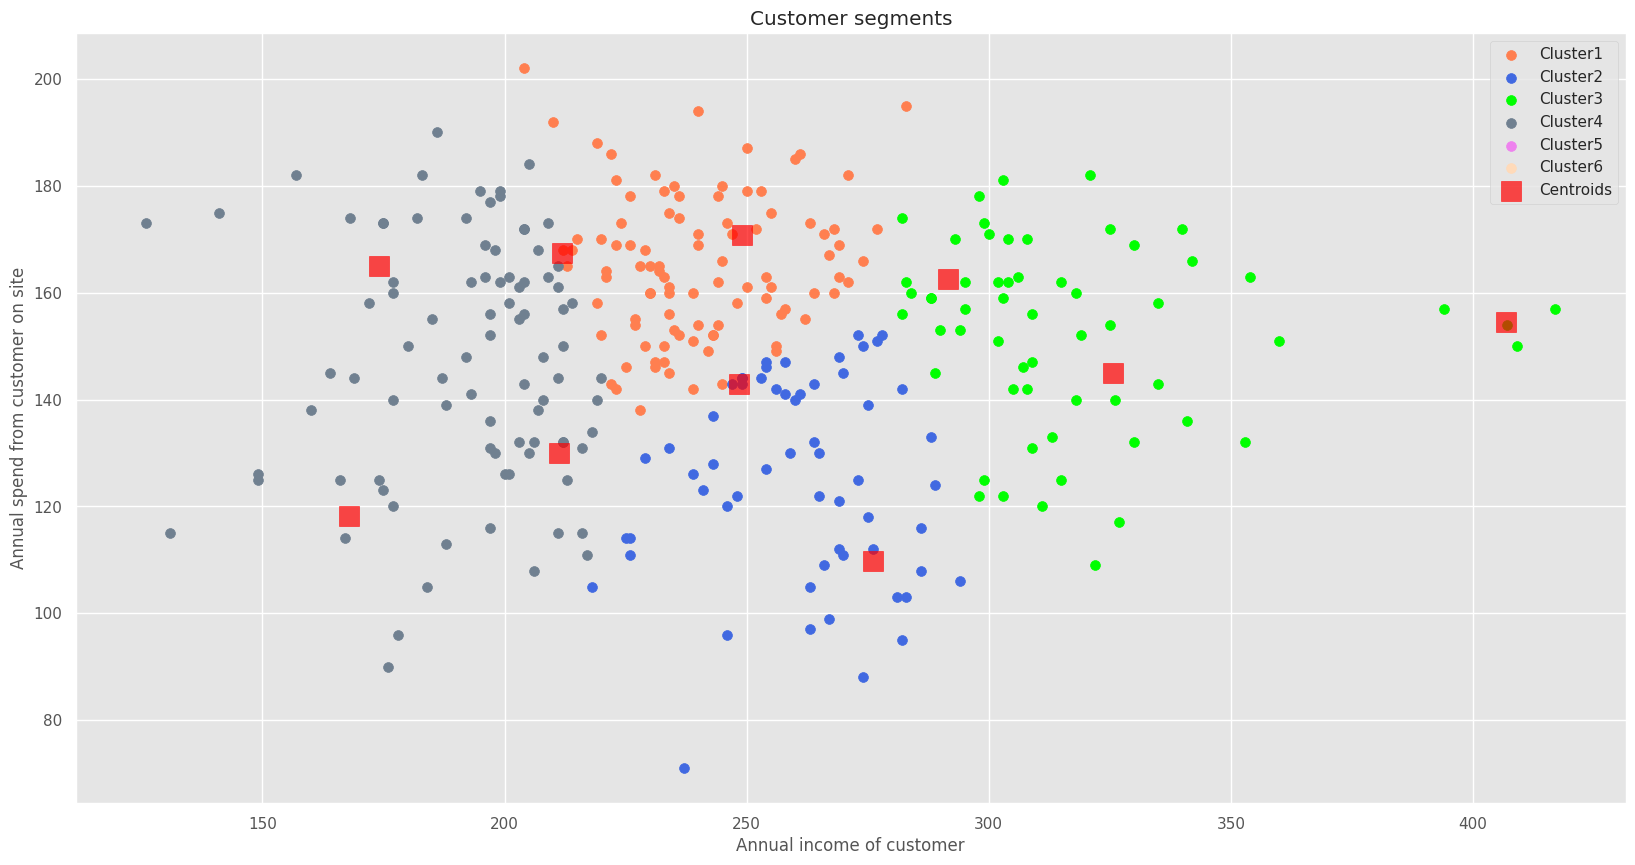

In [50]:


#Visualising the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='coral',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='royalblue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='lime',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='slategray',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='violet',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='peachpuff',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

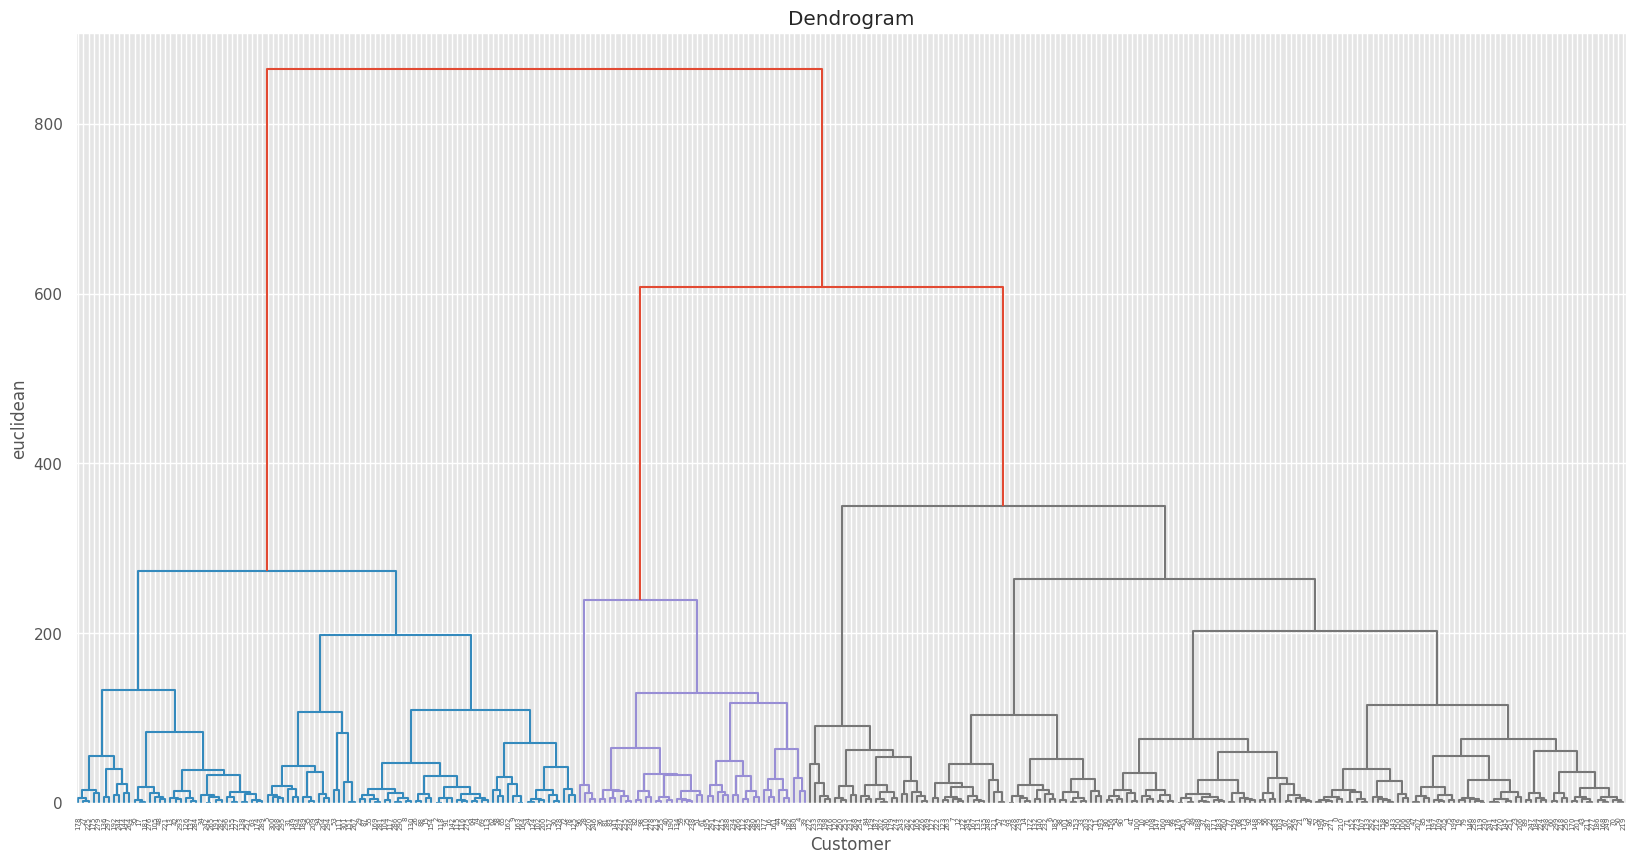

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


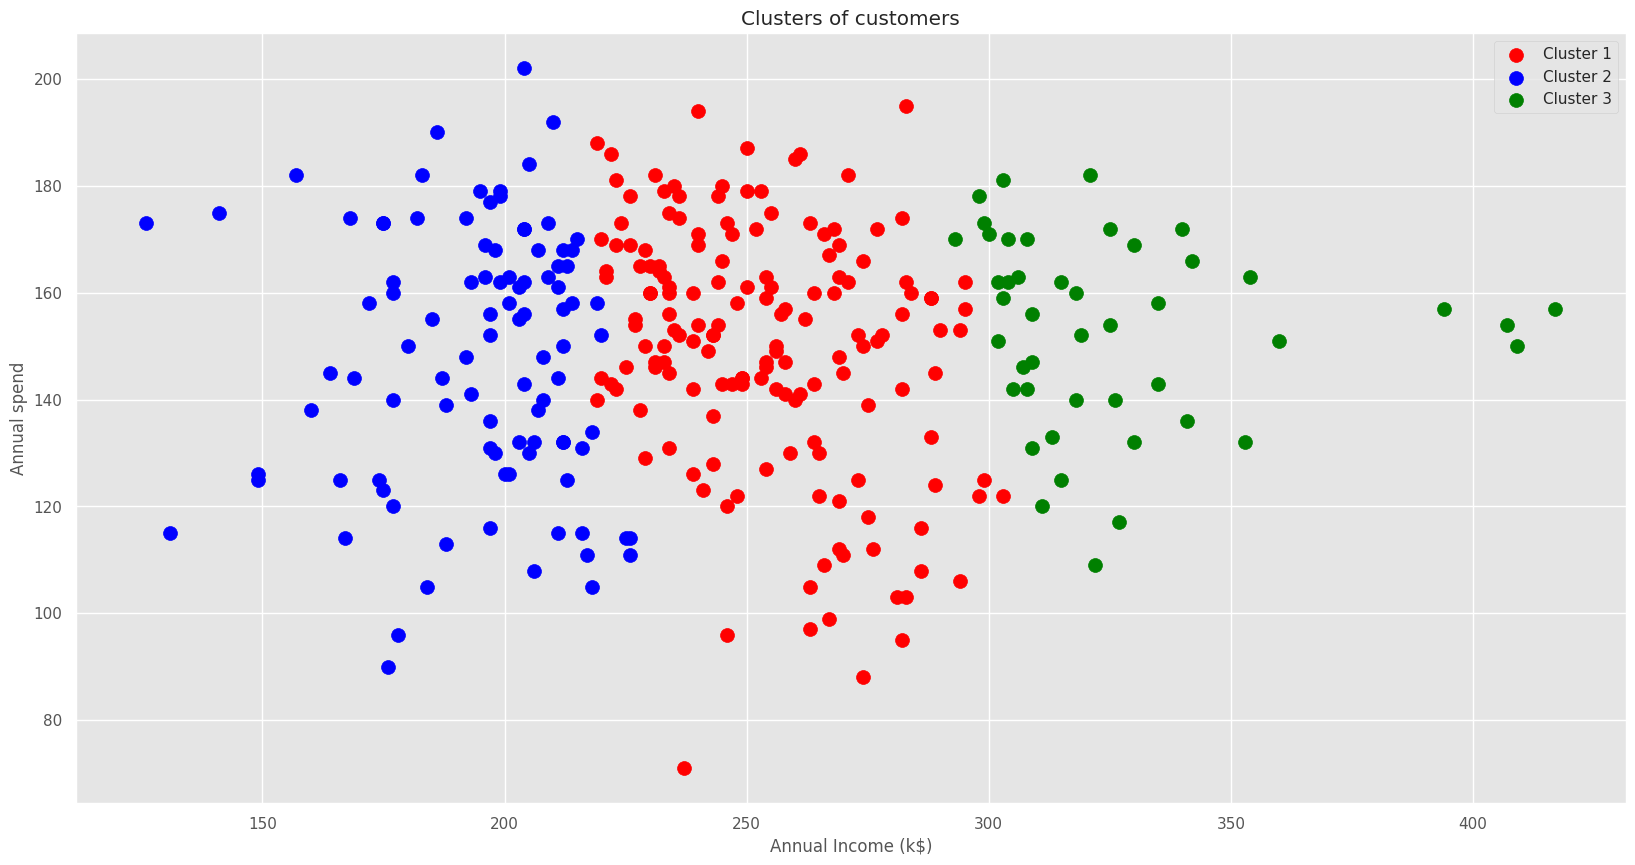

In [53]:

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)


# In[20]:


# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()


In [55]:
##Grouping by cluster
dataset['y_hc'] = y_hc # Add the y_hc array as a new column
grouped_cluster = dataset.groupby('y_hc')
grouped_cluster['INCOME'].count()

,INCOME
y_hc,
0,160
1,98
2,45
